In [17]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Add a image without a face to test if EDA will pick it up

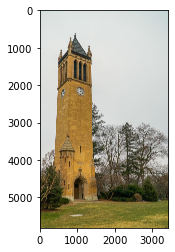

In [25]:
img = mpimg.imread('../data-capstone/fer2013_150x150/train/angry/a_test.jpg')
#img = mpimg.imread('../data-capstone/fer2013_150x150/train/angry/Training_3908.jpg')
imgplot = plt.imshow(img)
plt.show()

In [26]:
#process test image
    #path = f'../data-capstone/fer2013_150x150/train/angry/a_test.jpg'
  
    #folder = os.listdir(path)

img = cv2.imread('../data-capstone/fer2013_150x150/train/angry/a_test.jpg', cv2.IMREAD_UNCHANGED)
width = 150
height = 150
dim = (width, height)

      # resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
cv2.imwrite('../data-capstone/fer2013_150x150/train/angry/a_test.jpg',resized) 

True

In [30]:
#imagePath = sys.argv[1] #need if image is passed as an argument to when running script
#imagePath = '../data-capstone/fer2013_150x150/train/angry/Training_3908.jpg'
imagePath = '../data-capstone/fer2013_150x150/train/angry/a_test.jpg'

In [31]:
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# converts a color image to grayscale

In [32]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
)

print("Found {0} Faces!".format(len(faces)))

#used code from:
#https://www.digitalocean.com/community/tutorials/how-to-detect-and-extract-faces-from-an-image-with-opencv-and-python

Found 9 Faces!


In [33]:
#draw rectagle
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [34]:
status = cv2.imwrite('../data-capstone/fer2013_150x150/train/angry/faces_detected.jpg', image)

In [35]:
print ("Image faces_detected.jpg written to filesystem: ",status)

Image faces_detected.jpg written to filesystem:  True


## Iterate through images and make sure all have a detectable face

In [36]:
def test_face(folder_n):
    path = f'../data-capstone/fer2013_150x150/train/{folder_n}'
    folder = os.listdir(path)
    for item in folder:
        imgage = cv2.imread(f'../data-capstone/fer2013_150x150/train/{folder_n}/{item}')
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.3,
            minNeighbors=3,
            minSize=(30, 30))       
        
        if len(faces) > 1:
            print(item)

In [37]:
test_face('angry')

a_test.jpg
Training_10118481.jpg
Training_10120469.jpg
Training_10131352.jpg
Training_10161559.jpg
Training_1021836.jpg
Training_10269675.jpg
Training_10278738.jpg
Training_10290703.jpg
Training_10295477.jpg
Training_10315441.jpg
Training_10316849.jpg
Training_10333072.jpg
Training_10334355.jpg
Training_10345473.jpg
Training_10422050.jpg
Training_10485618.jpg
Training_10503476.jpg
Training_10524198.jpg
Training_10539399.jpg
Training_10592361.jpg
Training_10595751.jpg
Training_10608067.jpg
Training_10740356.jpg
Training_10851653.jpg
Training_10857340.jpg
Training_10882484.jpg
Training_10899258.jpg
Training_10922970.jpg
Training_10967257.jpg
Training_11023881.jpg
Training_11036720.jpg
Training_11102431.jpg
Training_11175213.jpg
Training_11185740.jpg
Training_1119091.jpg
Training_11206889.jpg
Training_1120923.jpg
Training_11247006.jpg
Training_11262281.jpg
Training_11275727.jpg
Training_1127865.jpg
Training_11292723.jpg
Training_11306820.jpg
Training_11319077.jpg
Training_11330391.jpg
Tra

KeyboardInterrupt: 

In [21]:
folders = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [22]:
for fold in folders:
    test_face(fold)